# Pytorch tutorial

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2

(28, 28, 3) (28, 28, 3)


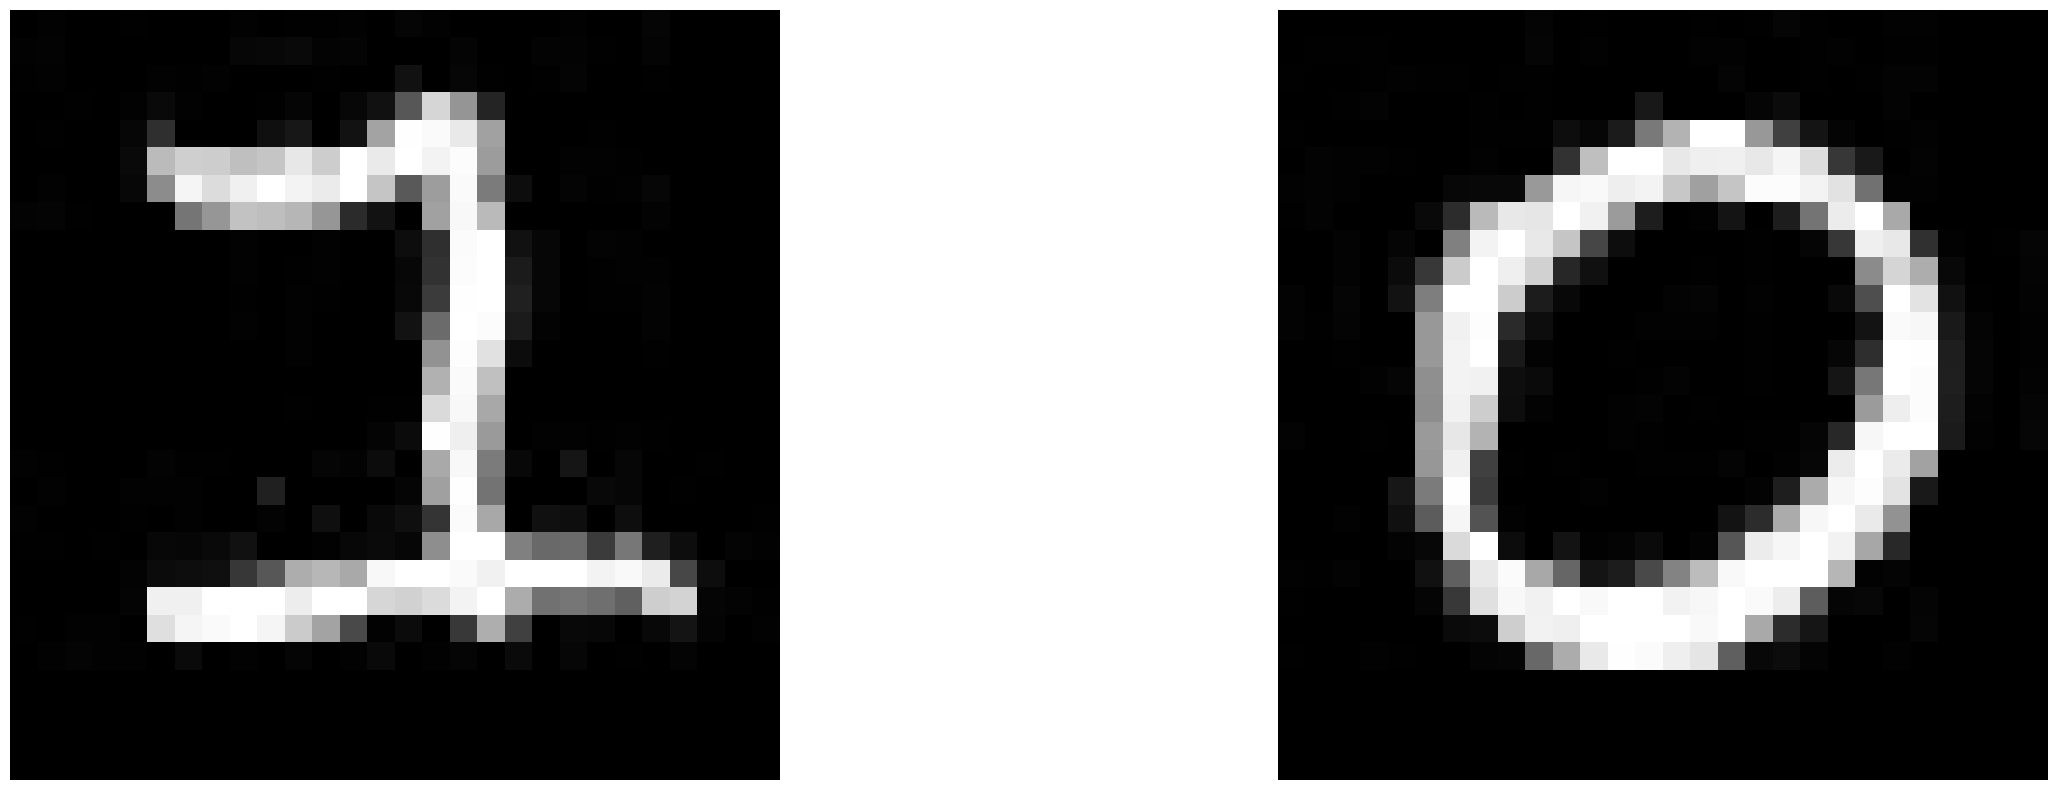

In [2]:
img1 = cv2.imread("./Images/image1.png") # Image read in numpy
img0 = cv2.imread("./Images/image0.png") 

print(img1.shape, img0.shape)

img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY) 
img0_gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY) 

plt.figure(figsize=[30,10])
plt.subplot(1, 2, 1)
plt.imshow(img1_gray, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(img0_gray, cmap='gray')
plt.axis('off')
plt.show()

In [3]:
print(f"Min image 0 pixel value:{np.min(img0)}, Max image 0 pixel value:{np.max(img0)}")
print(f"Min image 1 pixel value:{np.min(img1)}, Max image 1 pixel value:{np.max(img1)}")


Min image 0 pixel value:0, Max image 0 pixel value:255
Min image 1 pixel value:0, Max image 1 pixel value:255


In [4]:
img0_tensor = torch.tensor(img0, dtype=torch.float32) / 255.0 # numpy to tensor and normalization
img1_tensor = torch.tensor(img1, dtype=torch.float32) / 255.0 

print(f"Shapes of normalized tensors:\n\timg0: {img0.shape}\n\timg1: {img0.shape}")

Shapes of normalized tensors:
	img0: (28, 28, 3)
	img1: (28, 28, 3)


## Batched Images

Processing multiple images at once (a "batch") is significantly faster than processing them one by one. Batching:

* Reduces overhead from I/O operations.
* Allows parallel computation on GPUs or TPUs.
* Makes better use of system resources.

In [8]:
batch_tensor = torch.stack([img0_tensor, img1_tensor, img1_tensor])
batch_tensor.shape

torch.Size([3, 28, 28, 3])

Additionally in PyTorch, image tensors typically follow the shape convention [N ,C ,H ,W] unlike tensorflow which follows [N, H, W, C].

* N : number of images
* H, W : height and width
* C : Color vector dimension

Therefore, we need to bring the color channel to the second dimension. This can be achieved using either torch.view() or torch.permute()

In [9]:
batch_tensor.permute(0,3,2,1)
batch_tensor.shape

torch.Size([3, 28, 28, 3])

## Tensor Operations

In [12]:
t1 = torch.tensor([[1,2,3],[4,5,6]])
t2 = torch.tensor([[-1,2,-3],[4,-5,6]])
print(f"T1 = {t1}\n T2={t2}")

# Addition
print(f"T1+T2={t1+t2}")
# print(f"T1+T2={torch.add(t1,t2))

# Subtraction
print(f"T1-T2={t1-t2}")
# print(f"T1+T2={torch.sub(t1,t2))

# Multiplication 
print(f"T1*2={t1 * 2}")

# Tensor with another tensor (elementwise)
print(f"T1*T2={t1 * t2}")

# Matrix multiplication
t3 = torch.tensor([[1,2],[3,4],[5,6]])
print(f"T1*T3={torch.mm(t1,t3)}")

# Division
print(f"T1/2={t1/2}")

# Tensor with another tensor (elementwise)
print(f"T1+T2={t1/t2}")

# Broadcast
a = torch.tensor([1, 2, 3])
b = torch.tensor([4])

result = a + b

print("Result of Broadcasting:\n",result)

T1 = tensor([[1, 2, 3],
        [4, 5, 6]])
 T2=tensor([[-1,  2, -3],
        [ 4, -5,  6]])
T1+T2=tensor([[ 0,  4,  0],
        [ 8,  0, 12]])
T1-T2=tensor([[ 2,  0,  6],
        [ 0, 10,  0]])
T1*2=tensor([[ 2,  4,  6],
        [ 8, 10, 12]])
T1*T2=tensor([[ -1,   4,  -9],
        [ 16, -25,  36]])
T1*T3=tensor([[22, 28],
        [49, 64]])
T1/2=tensor([[0.5000, 1.0000, 1.5000],
        [2.0000, 2.5000, 3.0000]])
T1+T2=tensor([[-1.,  1., -1.],
        [ 1., -1.,  1.]])
Result of Broadcasting:
 tensor([5, 6, 7])


## CPU and GPU tensors

In [ ]:
tensor_cpu = torch.tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]], device='cpu') # CPU RAM
tensor_gpu = torch.tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]], device='cuda') # GPU RAM